# Exploratory Data Analysis
---

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

## 0. Constants

In [20]:
BOOKINGS_DATA = "../data/raw/customer_booking.csv"
RAW_DATA_PATH = "../data/raw/raw.csv"

---
## 1. Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 50
%matplotlib inline

sns.set_theme(style="darkgrid", palette="bright")

In [49]:
bookings_df = pd.read_csv(BOOKINGS_DATA, encoding="ISO-8859-1")

---
## 1.1 Functions

In [11]:
def inspect_data(df):
    print("-"*15, "Data Info", "-"*15, "\n")
    print(df.info(), "\n\n")
    
    print("-"*25, "Data Description: Numeric", "-"*25, "\n")
    print(df.describe(), "\n\n")
    
    print("-"*25, "Data Description: Object", "-"*25, "\n")
    print(df.describe(include=['O']), "\n\n")
    
    print("-"*10, "Missing Values", "-"*10, "\n")
    print(df.isnull().sum(), "\n\n")
    
    print("-"*10, "Duplicate Values", "-"*10, "\n")
    print(df.duplicated().sum(), "\n\n")
    
    print("-"*10, "Unique Values", "-"*10, "\n")
    print(df.nunique(), "\n\n")

---
## Data Inspection

In [7]:
bookings_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [12]:
inspect_data(bookings_df)

--------------- Data Info --------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64

In [15]:
#Check unique values of object columns
object_cols = bookings_df.select_dtypes(include="object")
for col in object_cols:
    print(f"{col} unique values:\n")
    print(bookings_df[col].unique())
    print("\n", "-"*20)

sales_channel unique values:

['Internet' 'Mobile']

 --------------------
trip_type unique values:

['RoundTrip' 'CircleTrip' 'OneWay']

 --------------------
flight_day unique values:

['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']

 --------------------
route unique values:

['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CA

In [17]:
#Check the distribution of the target
bookings_df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

---
## 3. Data Visualization

Text(0.5, 1.0, 'Distribution of top 10 booking origins')

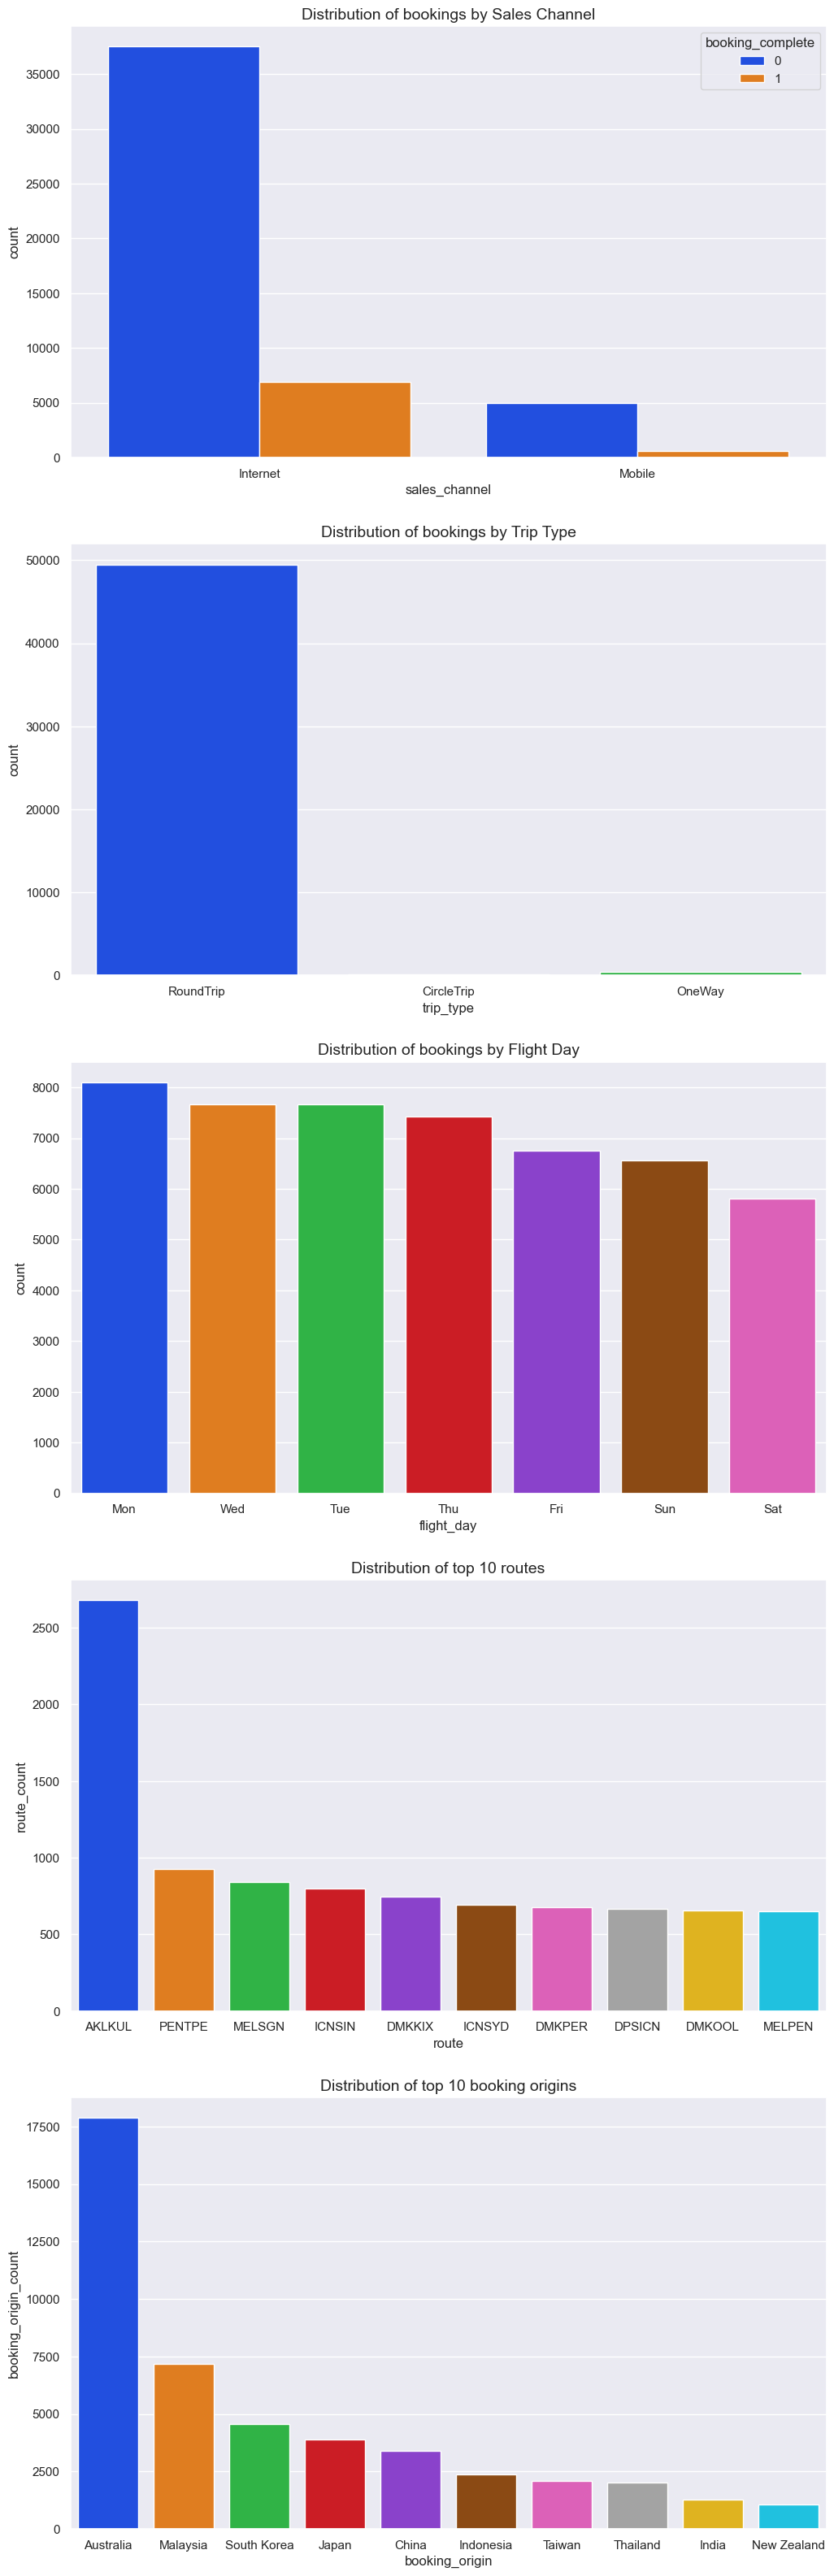

In [50]:
fig, ax = plt.subplots(5,1, figsize= (12,40))

plt.subplot(5,1,1)
sns.countplot(bookings_df, x="sales_channel", hue="booking_complete")
plt.title("Distribution of bookings by Sales Channel", fontsize=14)

plt.subplot(5,1,2)
sns.countplot(bookings_df, x="trip_type")
plt.title("Distribution of bookings by Trip Type", fontsize=14)

plt.subplot(5,1,3)
sns.countplot(bookings_df, x="flight_day", order=bookings_df["flight_day"].value_counts().index)
plt.title("Distribution of bookings by Flight Day", fontsize=14)


plt.subplot(5,1,4)
route_top10 = (
    bookings_df.groupby("route")
    .agg({"route":"count"})
    .rename(columns={"route":"route_count"})
    .sort_values("route_count",ascending=False))[:10]

sns.barplot(route_top10, x=route_top10.index, y="route_count")
plt.title("Distribution of top 10 routes", fontsize=14)


plt.subplot(5,1,5)
booking_origin_top10 = (
    bookings_df.groupby("booking_origin")
    .agg({"booking_origin":"count"})
    .rename(columns={"booking_origin":"booking_origin_count"})
    .sort_values("booking_origin_count",ascending=False))[:10]

sns.barplot(booking_origin_top10, x=booking_origin_top10.index, y="booking_origin_count")
plt.title("Distribution of top 10 booking origins", fontsize=14)

> **Insights:** \
>**1. People tend to surf the web more often for bookings than through mobile, but the conversion rate is not high for both.** \
> **2. Round trips dominate the bookings** \
> **3. People tend to fly more during the weekdays than weekends** \
> **4. AKLKUL route counts for more than double of any ohter route** \
> **5. Bookings from Australia are around one third the of the total bookings**

Text(0.5, 1.0, 'Distribution of bookings by Hour of Flight')

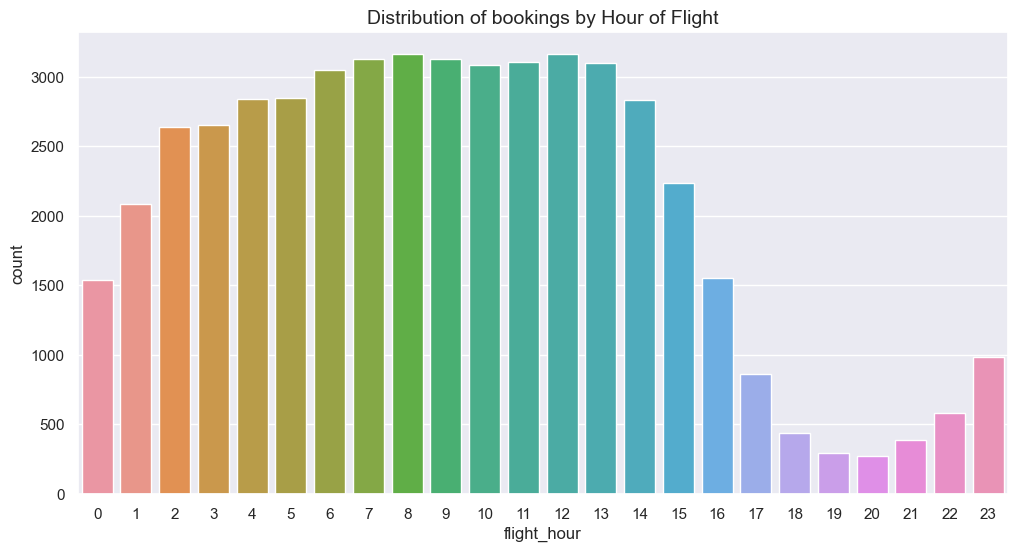

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(bookings_df, x="flight_hour")
plt.title("Distribution of bookings by Hour of Flight", fontsize=14)

Text(0.5, 1.0, 'Distribution of bookings by Flight Duration in Hours')

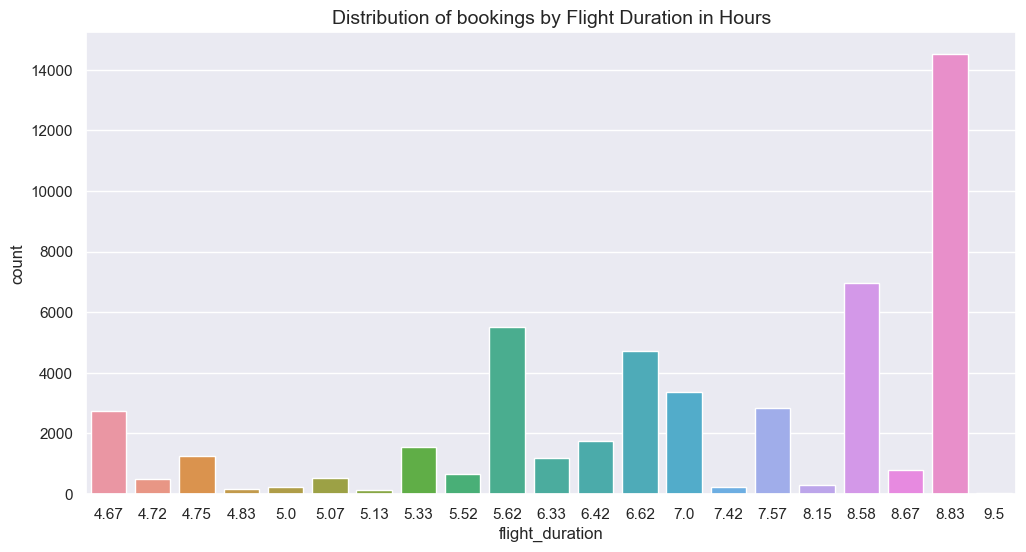

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(bookings_df, x="flight_duration")
plt.title("Distribution of bookings by Flight Duration in Hours", fontsize=14)

> **Insights:** \
>**Majority of people tend to fly more often between morning till aftenoon** \ 
>**Lengthy flight trips happen more often, & this matches with the fact that most of bookings come from Australia & South East countries.**

---
## 4. Save Final Data

In [57]:
bookings_df = bookings_df.drop_duplicates()
bookings_df.duplicated().sum()

0

In [58]:
bookings_df.to_csv(RAW_DATA_PATH, index=False, header=True)